<a href="https://colab.research.google.com/github/wakepon21/Masa/blob/The-4th-Tellus/The_4th_Tellus_Satellite_Challenge%EF%BC%9A%E6%B5%B7%E5%B2%B8%E7%B7%9A%E3%81%AE%E6%8A%BD%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ls

sample_data/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import pickle

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tifffile
from tqdm.auto import tqdm

In [5]:
# データの読み込み
idx = 0
data = tifffile.imread(f'drive/My Drive/competition/signate/The 4th Tellus Satellite Challenge/train_images/train_{idx:02d}.tif')
with open(f"drive/My Drive/competition/signate/The 4th Tellus Satellite Challenge/train_annotations/train_{idx:02d}.json", "r") as fp:
    annotation = json.load(fp)

In [6]:
# データの型、サイズ
type(data), data.shape

(numpy.ndarray, (2914, 5925))

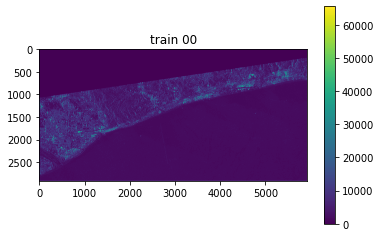

In [7]:
# プロット
plt.title(f"train {idx:02d}")
plt.imshow(data)
plt.colorbar()
plt.show()

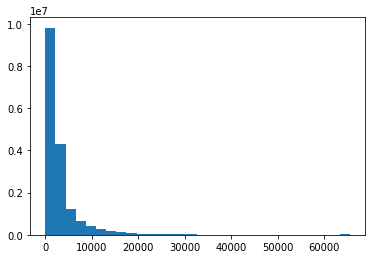

In [8]:
# 輝度のヒストグラム
plt.hist(data.flatten(), bins=30)
plt.show()

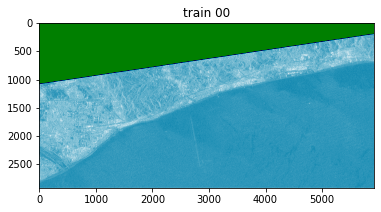

In [11]:
# ログスケールでの可視化ログスケールでの可視化
plt.title(f"train {idx:02d}")
plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
plt.show()

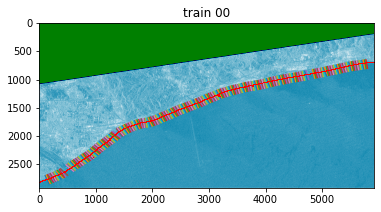

In [12]:
# annotationデータのプロット
plt.title(f"train {idx:02d}")
plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
for line in annotation['validate_lines']:
    ix = [line[i][0] for i in range(2)]
    iy = [line[i][1] for i in range(2)]
    plt.plot(ix, iy)
for point in annotation['coastline_points']:
    plt.plot(point[0], point[1], ",", color="red")
plt.show()

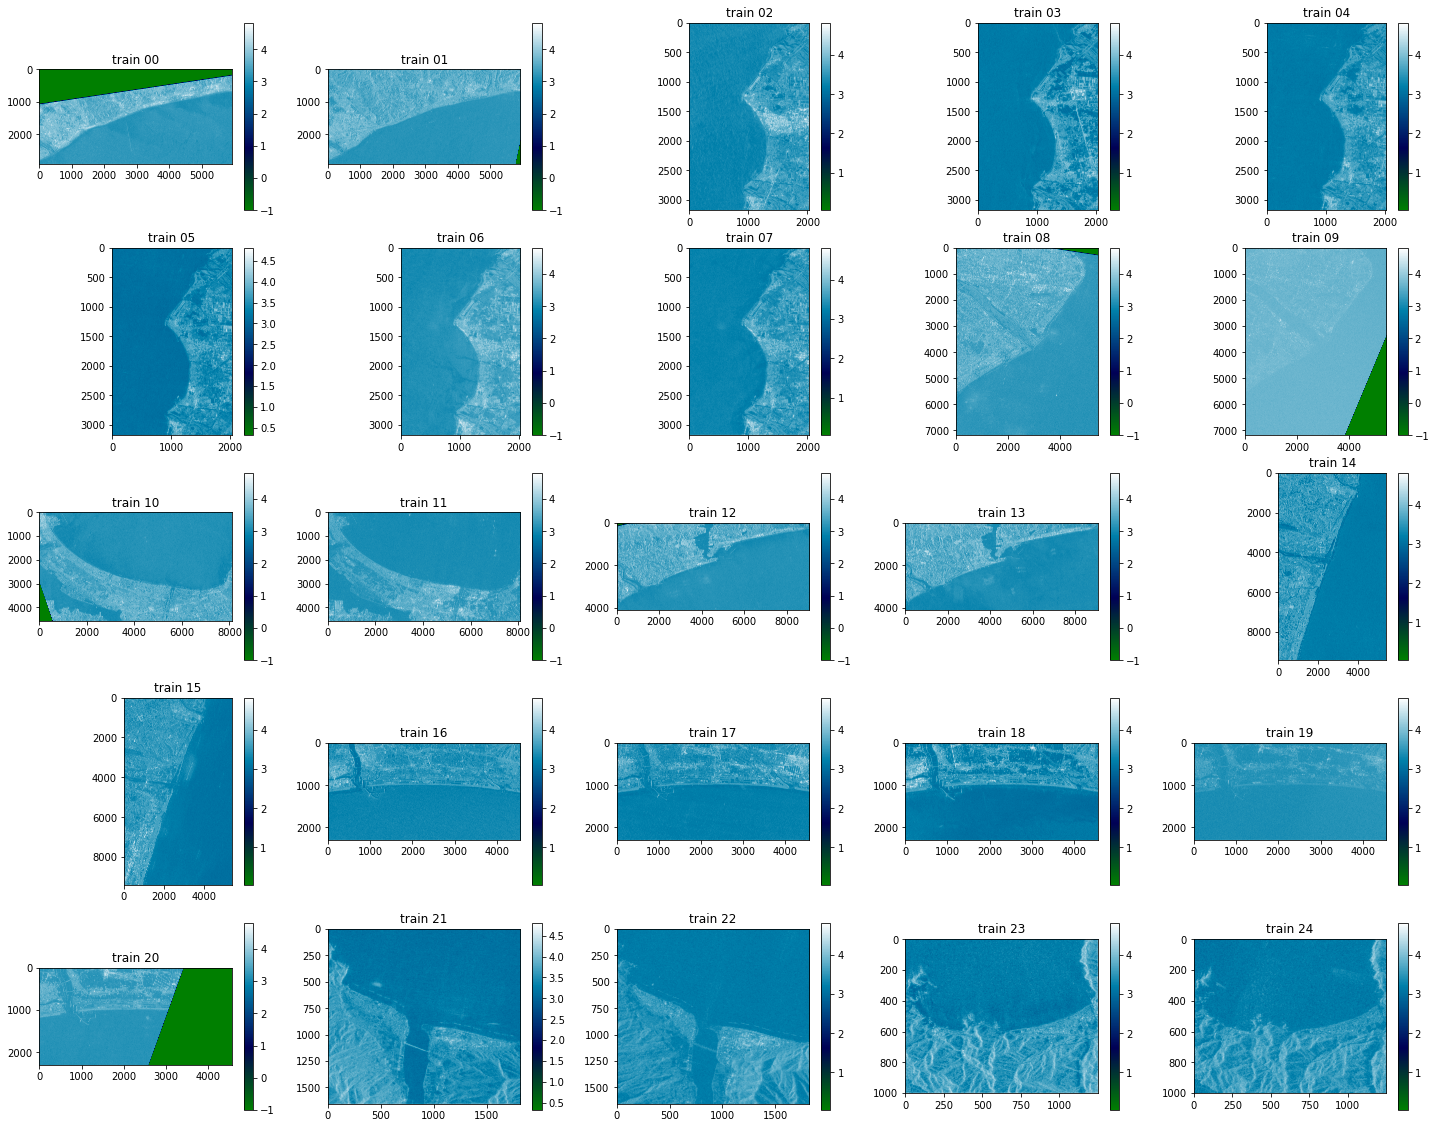

In [14]:
# trainデータ全体の可視化
plt.figure(figsize=(5*5,5*4))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.title(f"train {idx:02d}")
    data = tifffile.imread(f'drive/My Drive/competition/signate/The 4th Tellus Satellite Challenge/train_images/train_{idx:02d}.tif')
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    plt.colorbar()
plt.savefig("drive/My Drive/competition/signate/The 4th Tellus Satellite Challenge/image.png")
plt.show()

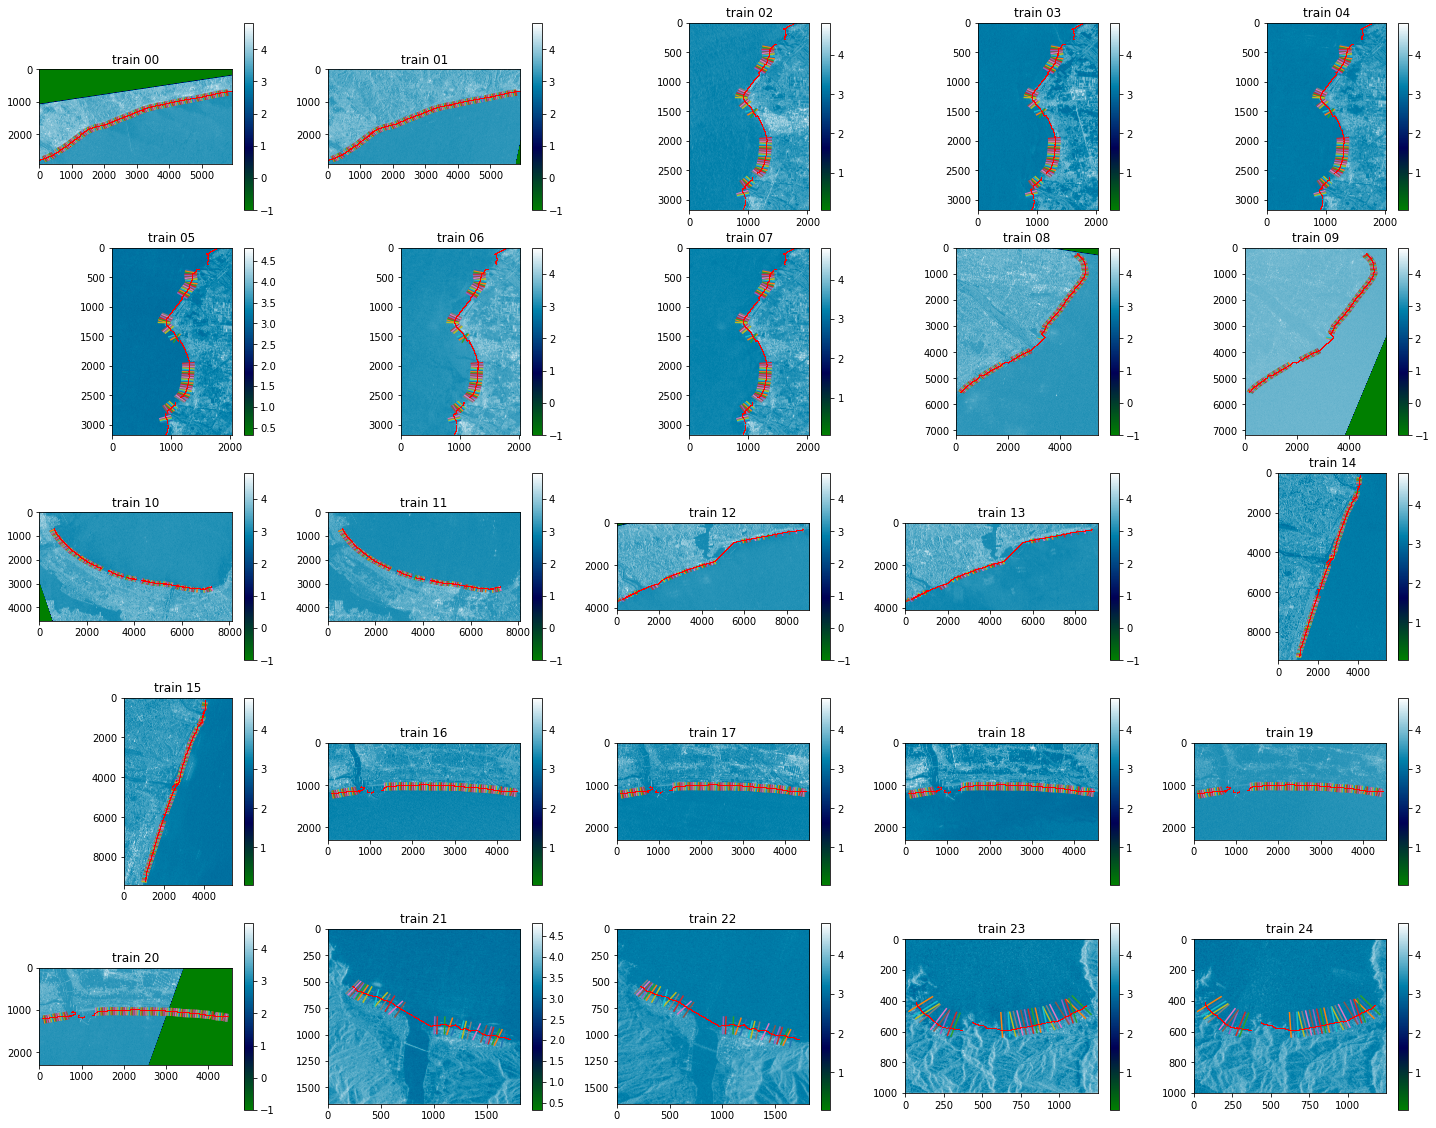

In [16]:
# trainデータ全体の可視化
plt.figure(figsize=(5*5,5*4))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.title(f"train {idx:02d}")
    data = tifffile.imread(f'drive/My Drive/competition/signate/The 4th Tellus Satellite Challenge/train_images/train_{idx:02d}.tif')
    with open(f"drive/My Drive/competition/signate/The 4th Tellus Satellite Challenge/train_annotations/train_{idx:02d}.json", "r") as fp:
        annotation = json.load(fp)
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    for line in annotation['validate_lines']:
        ix = [line[i][0] for i in range(2)]
        iy = [line[i][1] for i in range(2)]
        plt.plot(ix, iy)
    for point in annotation['coastline_points']:
        plt.plot(point[0], point[1], ",", color="red")
    plt.colorbar()
plt.savefig("drive/My Drive/competition/signate/The 4th Tellus Satellite Challenge/image_w_annotate.png")
plt.show()